# Libraries

In [ ]:
import os
import numpy as np
import pandas as pd
from sklearn import preprocessing
import re

# Loading Data

In [ ]:
dir_name = "/content/drive/MyDrive/DATA PREMIER LEAGUE/DATA PREMIER LEAGUE"
dir_name

'/content/drive/MyDrive/DATA PREMIER LEAGUE/DATA PREMIER LEAGUE'

In [ ]:
players_df = pd.read_excel(f"{dir_name}/Players List.xlsx")

In [ ]:
players_df.head()

,Team,Player,Role,Auction Price,Nation
0,CSK,MS Dhoni,Batsman,INR 12 Cr(R),India
1,CSK,Ruturaj Gaikwad,Batsman,INR 6 Cr(R),India
2,CSK,Devon Conway,Batsman,INR 1 crores(R),New Zealand
3,CSK,Deepak Chahar,Bowler,INR 14 crores(R),India
4,CSK,Tushar Deshpande,Bowler,INR 20 Lakhs(R),India


# Preprocessing Players Data

In [ ]:
le = preprocessing.LabelEncoder()
players_df['team_encode'] = le.fit_transform(players_df.Team.values)

In [ ]:
le = preprocessing.LabelEncoder()
players_df['player_encode'] = le.fit_transform(players_df.Player.values)

In [ ]:
le = preprocessing.LabelEncoder()
players_df['country_encode'] = le.fit_transform(players_df.Nation.values)

In [ ]:
le = preprocessing.LabelEncoder()
players_df['role_encode'] = le.fit_transform(players_df.Role.values)

In [ ]:
players_df

,Team,Player,Role,Auction Price,Nation,team_encode,player_encode,country_encode,role_encode
0,CSK,MS Dhoni,Batsman,INR 12 Cr(R),India,0,98,4,2
1,CSK,Ruturaj Gaikwad,Batsman,INR 6 Cr(R),India,0,174,4,2
2,CSK,Devon Conway,Batsman,INR 1 crores(R),New Zealand,0,45,6,2
3,CSK,Deepak Chahar,Bowler,INR 14 crores(R),India,0,42,4,3
4,CSK,Tushar Deshpande,Bowler,INR 20 Lakhs(R),India,0,221,4,3
...,...,...,...,...,...,...,...,...,...
240,SRH,Wanindu Hasaranga,Allrounder,INR 1.50 Crores,Sri Lanka,9,235,9,0
241,SRH,Pat Cummins,Allrounder,INR 20.50 Crores,Australia,9,138,1,0
242,SRH,Jaydev Unadkat,Bowler,INR 1.60 Crores,India,9,71,4,3
243,SRH,Akash Singh,Bowler,INR 20 Lakh,India,9,11,4,3


In [ ]:
players_df.Team.unique()

array(['CSK', 'DC', 'GT', 'KKR', 'LSG', 'MI', 'PBKS', 'RR', 'RCB', 'SRH'],
      dtype=object)

In [ ]:
teams = {
    "CSK": "Chennai Super Kings",
    "SRH": "Sunrisers Hyderabad",
    "DC": "Delhi Capitals",
    "GT": "Gujarat Titans",
    "KKR": "Kolkata Knight Riders",
    "LSG": "Lucknow Super Giants",
    "MI": "Mumbai Indians",
    "PBKS": "Punjab Kings",
    "RR": "Rajasthan Royals",
    "RCB": "Royal Challengers Bangalore",
}
teams

{'CSK': 'Chennai Super Kings',
 'SRH': 'Sunrisers Hyderabad',
 'DC': 'Delhi Capitals',
 'GT': 'Gujarat Titans',
 'KKR': 'Kolkata Knight Riders',
 'LSG': 'Lucknow Super Giants',
 'MI': 'Mumbai Indians',
 'PBKS': 'Punjab Kings',
 'RR': 'Rajasthan Royals',
 'RCB': 'Royal Challengers Bangalore'}

In [ ]:
players_df["team_full_name"] = players_df.apply(lambda x: teams[x["Team"]], axis=1)
players_df

,Team,Player,Role,Auction Price,Nation,team_encode,player_encode,country_encode,role_encode,team_full_name
0,CSK,MS Dhoni,Batsman,INR 12 Cr(R),India,0,98,4,2,Chennai Super Kings
1,CSK,Ruturaj Gaikwad,Batsman,INR 6 Cr(R),India,0,174,4,2,Chennai Super Kings
2,CSK,Devon Conway,Batsman,INR 1 crores(R),New Zealand,0,45,6,2,Chennai Super Kings
3,CSK,Deepak Chahar,Bowler,INR 14 crores(R),India,0,42,4,3,Chennai Super Kings
4,CSK,Tushar Deshpande,Bowler,INR 20 Lakhs(R),India,0,221,4,3,Chennai Super Kings
...,...,...,...,...,...,...,...,...,...,...
240,SRH,Wanindu Hasaranga,Allrounder,INR 1.50 Crores,Sri Lanka,9,235,9,0,Sunrisers Hyderabad
241,SRH,Pat Cummins,Allrounder,INR 20.50 Crores,Australia,9,138,1,0,Sunrisers Hyderabad
242,SRH,Jaydev Unadkat,Bowler,INR 1.60 Crores,India,9,71,4,3,Sunrisers Hyderabad
243,SRH,Akash Singh,Bowler,INR 20 Lakh,India,9,11,4,3,Sunrisers Hyderabad


In [ ]:
players_df.to_csv(f"{dir_name}/preprocessed_players_list.csv")

# Preprocessing Bowler's Data

In [ ]:
df = pd.ExcelFile(f"{dir_name}/CSK/BOWLERS/CSK_BOWLERS.xlsx")

In [ ]:
df.sheet_names

['Rajvardhan Hangargekar',
 'Deepak Chahar',
 'Maheesh Theekshana',
 'Mukesh Choudhary',
 'Mustafizur Rahman',
 'Prashant Solanki',
 'Simarjeet Singh',
 'Tushar Deshpande',
 'Matheesha Pathirana']

In [ ]:
# csk = pd.read_excel(df, sheet_name="Deepak Chahar")
csk = pd.read_excel(df, sheet_name="Deepak Chahar", dtype={'Wickets': str})

In [ ]:
csk.dtypes


Match                float64
Date                  object
M/Inns                object
Versus                object
Ground                object
Batsman Dismissed     object
Overs                float64
Wickets               object
Unnamed: 8           float64
S/R                  float64
E/R                  float64
Wkts                   int64
Avg                  float64
dtype: object

In [ ]:
csk.head(30)

,Match,Date,M/Inns,Versus,Ground,Batsman Dismissed,Overs,Wickets,Unnamed: 8,S/R,E/R,Wkts,Avg
0,1.0,17/05/2016,1st,Delhi Capitals,Dr YS Rajasekhara Reddy Cricket Stadium,NaN,2.0,0/13,NaN,NaN,6.50,0,NaN
1,2.0,21/05/2016,1st,Punjab Kings,Dr YS Rajasekhara Reddy Cricket Stadium,NaN,3.0,0/28,NaN,NaN,8.20,0,NaN
2,3.0,2017-06-04 00:00:00,1st,Mumbai Indians,Maharashtra Cricket Association Stadium,NaN,2.0,0/21,NaN,NaN,8.86,0,NaN
3,4.0,2017-11-04 00:00:00,1st,Delhi Capitals,Maharashtra Cricket Association Stadium,A P Tare (c †M S Dhoni),3.0,1/35,NaN,60.00,9.70,1,97.00
4,5.0,29/04/2017,2nd,Royal Challengers Bangalore,Maharashtra Cricket Association Stadium,NaN,2.0,0/18,NaN,72.00,9.58,1,115.00
5,6.0,2018-07-04 00:00:00,1st,Mumbai Indians,Wankhede Stadium,E Lewis (lbw),3.0,2024-01-14 00:00:00,NaN,45.00,8.60,2,64.50
6,7.0,2018-10-04 00:00:00,1st,Kolkata Knight Riders,MA Chidambaram Stadium,NaN,1.0,0/18,NaN,48.00,9.19,2,73.50
7,8.0,15/04/2018,1st,Punjab Kings,Punjab Cricket Association IS Bindra Stadium,NaN,3.0,0/37,NaN,57.00,9.68,2,92.00
8,9.0,20/04/2018,2nd,Rajasthan Royals,Maharashtra Cricket Association Stadium,S V Samson (c K V Sharma),4.0,2/30,NaN,34.50,9.30,3,53.50
9,NaN,NaN,NaN,NaN,NaN,A M Rahane (b),NaN,NaN,NaN,NaN,NaN,4,NaN


In [ ]:
csk.dtypes

Match                float64
Date                  object
M/Inns                object
Versus                object
Ground                object
Batsman Dismissed     object
Overs                float64
Wickets               object
Unnamed: 8           float64
S/R                  float64
E/R                  float64
Wkts                   int64
Avg                  float64
dtype: object

In [ ]:
csk['Date'] = pd.to_datetime(csk['Date'], infer_datetime_format=True)

<ipython-input-92-d3066a65332e>:1: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.



In [ ]:
csk

,Match,Date,M/Inns,Versus,Ground,Batsman Dismissed,Overs,Wickets,Unnamed: 8,S/R,E/R,Wkts,Avg
0,1.0,2016-05-17,1st,Delhi Capitals,Dr YS Rajasekhara Reddy Cricket Stadium,NaN,2.0,0/13,NaN,NaN,6.50,0,NaN
1,2.0,2016-05-21,1st,Punjab Kings,Dr YS Rajasekhara Reddy Cricket Stadium,NaN,3.0,0/28,NaN,NaN,8.20,0,NaN
2,3.0,2017-06-04,1st,Mumbai Indians,Maharashtra Cricket Association Stadium,NaN,2.0,0/21,NaN,NaN,8.86,0,NaN
3,4.0,2017-11-04,1st,Delhi Capitals,Maharashtra Cricket Association Stadium,A P Tare (c †M S Dhoni),3.0,1/35,NaN,60.00,9.70,1,97.00
4,5.0,2017-04-29,2nd,Royal Challengers Bangalore,Maharashtra Cricket Association Stadium,NaN,2.0,0/18,NaN,72.00,9.58,1,115.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,NaN,NaT,NaN,NaN,NaN,R R Rossouw (b),NaN,NaN,NaN,NaN,NaN,68,NaN
99,NaN,NaT,NaN,NaN,NaN,A R Patel (c R D Gaikwad),NaN,NaN,NaN,NaN,NaN,69,NaN
100,72.0,2023-05-23,2nd,Gujarat Titans,MA Chidambaram Stadium,W P Saha (c M Pathirana),4.0,2024-02-29 00:00:00,NaN,21.18,7.90,70,27.90
101,NaN,NaT,NaN,NaN,NaN,Shubman Gill (c D P Conway),NaN,NaN,NaN,NaN,NaN,71,NaN


In [ ]:
for index, row in csk.iterrows():
    if str(row["Wickets"]).startswith("2024"):
        lst = list(row["Wickets"].split("-"))
        wkts = lst[1]
        runs = lst[2].split(" ")[0]
        # row["Wickets"] = f"{wkts}/{runs}"

        csk.loc[index, 'Wickets'] = f"{wkts}/{runs}"

In [ ]:
csk.head(10)

,Match,Date,M/Inns,Versus,Ground,Batsman Dismissed,Overs,Wickets,Unnamed: 8,S/R,E/R,Wkts,Avg
0,1.0,2016-05-17,1st,Delhi Capitals,Dr YS Rajasekhara Reddy Cricket Stadium,NaN,2.0,0/13,NaN,NaN,6.50,0,NaN
1,2.0,2016-05-21,1st,Punjab Kings,Dr YS Rajasekhara Reddy Cricket Stadium,NaN,3.0,0/28,NaN,NaN,8.20,0,NaN
2,3.0,2017-06-04,1st,Mumbai Indians,Maharashtra Cricket Association Stadium,NaN,2.0,0/21,NaN,NaN,8.86,0,NaN
3,4.0,2017-11-04,1st,Delhi Capitals,Maharashtra Cricket Association Stadium,A P Tare (c †M S Dhoni),3.0,1/35,NaN,60.0,9.70,1,97.0
4,5.0,2017-04-29,2nd,Royal Challengers Bangalore,Maharashtra Cricket Association Stadium,NaN,2.0,0/18,NaN,72.0,9.58,1,115.0
5,6.0,2018-07-04,1st,Mumbai Indians,Wankhede Stadium,E Lewis (lbw),3.0,01/14,NaN,45.0,8.60,2,64.5
6,7.0,2018-10-04,1st,Kolkata Knight Riders,MA Chidambaram Stadium,NaN,1.0,0/18,NaN,48.0,9.19,2,73.5
7,8.0,2018-04-15,1st,Punjab Kings,Punjab Cricket Association IS Bindra Stadium,NaN,3.0,0/37,NaN,57.0,9.68,2,92.0
8,9.0,2018-04-20,2nd,Rajasthan Royals,Maharashtra Cricket Association Stadium,S V Samson (c K V Sharma),4.0,2/30,NaN,34.5,9.30,3,53.5
9,NaN,NaT,NaN,NaN,NaN,A M Rahane (b),NaN,NaN,NaN,NaN,NaN,4,NaN


In [ ]:
def condition(x):
    if x=="1st":
        return int(1)
    elif x=="2nd":
        return int(2)
    else:
        return np.nan

# Applying the conditions
csk['M/Inns'] = csk['M/Inns'].apply(condition)


In [ ]:
csk.head(5)

,Match,Date,M/Inns,Versus,Ground,Batsman Dismissed,Overs,Wickets,Unnamed: 8,S/R,E/R,Wkts,Avg
0,1.0,2016-05-17,1.0,Delhi Capitals,Dr YS Rajasekhara Reddy Cricket Stadium,NaN,2.0,0/13,NaN,NaN,6.50,0,NaN
1,2.0,2016-05-21,1.0,Punjab Kings,Dr YS Rajasekhara Reddy Cricket Stadium,NaN,3.0,0/28,NaN,NaN,8.20,0,NaN
2,3.0,2017-06-04,1.0,Mumbai Indians,Maharashtra Cricket Association Stadium,NaN,2.0,0/21,NaN,NaN,8.86,0,NaN
3,4.0,2017-11-04,1.0,Delhi Capitals,Maharashtra Cricket Association Stadium,A P Tare (c †M S Dhoni),3.0,1/35,NaN,60.0,9.70,1,97.0
4,5.0,2017-04-29,2.0,Royal Challengers Bangalore,Maharashtra Cricket Association Stadium,NaN,2.0,0/18,NaN,72.0,9.58,1,115.0


In [ ]:
csk.columns

Index(['Match', 'Date', 'M/Inns', 'Versus', 'Ground', 'Batsman Dismissed',
       'Overs', 'Wickets', 'Unnamed: 8', 'S/R', 'E/R', 'Wkts', 'Avg'],
      dtype='object')

In [ ]:
for i in csk.columns:
    if i != "Batsman Dismissed" and i != "Wkts":
        csk[i] = csk[i].fillna(method="ffill")

In [ ]:
csk['Batsman Dismissed'] = csk['Batsman Dismissed'].str.replace(r"\(.*?\)","()", regex=True)

In [ ]:
csk.head(30)

,Match,Date,M/Inns,Versus,Ground,Batsman Dismissed,Overs,Wickets,Unnamed: 8,S/R,E/R,Wkts,Avg
0,1.0,2016-05-17,1.0,Delhi Capitals,Dr YS Rajasekhara Reddy Cricket Stadium,NaN,2.0,0/13,NaN,NaN,6.50,0,NaN
1,2.0,2016-05-21,1.0,Punjab Kings,Dr YS Rajasekhara Reddy Cricket Stadium,NaN,3.0,0/28,NaN,NaN,8.20,0,NaN
2,3.0,2017-06-04,1.0,Mumbai Indians,Maharashtra Cricket Association Stadium,NaN,2.0,0/21,NaN,NaN,8.86,0,NaN
3,4.0,2017-11-04,1.0,Delhi Capitals,Maharashtra Cricket Association Stadium,A P Tare (),3.0,1/35,NaN,60.00,9.70,1,97.00
4,5.0,2017-04-29,2.0,Royal Challengers Bangalore,Maharashtra Cricket Association Stadium,NaN,2.0,0/18,NaN,72.00,9.58,1,115.00
5,6.0,2018-07-04,1.0,Mumbai Indians,Wankhede Stadium,E Lewis (),3.0,01/14,NaN,45.00,8.60,2,64.50
6,7.0,2018-10-04,1.0,Kolkata Knight Riders,MA Chidambaram Stadium,NaN,1.0,0/18,NaN,48.00,9.19,2,73.50
7,8.0,2018-04-15,1.0,Punjab Kings,Punjab Cricket Association IS Bindra Stadium,NaN,3.0,0/37,NaN,57.00,9.68,2,92.00
8,9.0,2018-04-20,2.0,Rajasthan Royals,Maharashtra Cricket Association Stadium,S V Samson (),4.0,2/30,NaN,34.50,9.30,3,53.50
9,9.0,2018-04-20,2.0,Rajasthan Royals,Maharashtra Cricket Association Stadium,A M Rahane (),4.0,2/30,NaN,34.50,9.30,4,53.50


In [ ]:
csk['Batsman Dismissed'] = csk['Batsman Dismissed'].str.replace(r'(', '', regex=True)
csk['Batsman Dismissed'] = csk['Batsman Dismissed'].str.replace(r')', '', regex=True)

In [ ]:
csk.head(30)

,Match,Date,M/Inns,Versus,Ground,Batsman Dismissed,Overs,Wickets,Unnamed: 8,S/R,E/R,Wkts,Avg
0,1.0,2016-05-17,1.0,Delhi Capitals,Dr YS Rajasekhara Reddy Cricket Stadium,NaN,2.0,0/13,NaN,NaN,6.50,0,NaN
1,2.0,2016-05-21,1.0,Punjab Kings,Dr YS Rajasekhara Reddy Cricket Stadium,NaN,3.0,0/28,NaN,NaN,8.20,0,NaN
2,3.0,2017-06-04,1.0,Mumbai Indians,Maharashtra Cricket Association Stadium,NaN,2.0,0/21,NaN,NaN,8.86,0,NaN
3,4.0,2017-11-04,1.0,Delhi Capitals,Maharashtra Cricket Association Stadium,A P Tare,3.0,1/35,NaN,60.00,9.70,1,97.00
4,5.0,2017-04-29,2.0,Royal Challengers Bangalore,Maharashtra Cricket Association Stadium,NaN,2.0,0/18,NaN,72.00,9.58,1,115.00
5,6.0,2018-07-04,1.0,Mumbai Indians,Wankhede Stadium,E Lewis,3.0,01/14,NaN,45.00,8.60,2,64.50
6,7.0,2018-10-04,1.0,Kolkata Knight Riders,MA Chidambaram Stadium,NaN,1.0,0/18,NaN,48.00,9.19,2,73.50
7,8.0,2018-04-15,1.0,Punjab Kings,Punjab Cricket Association IS Bindra Stadium,NaN,3.0,0/37,NaN,57.00,9.68,2,92.00
8,9.0,2018-04-20,2.0,Rajasthan Royals,Maharashtra Cricket Association Stadium,S V Samson,4.0,2/30,NaN,34.50,9.30,3,53.50
9,9.0,2018-04-20,2.0,Rajasthan Royals,Maharashtra Cricket Association Stadium,A M Rahane,4.0,2/30,NaN,34.50,9.30,4,53.50


In [ ]:
def batsmen_preprocess(pathway, teamname):
    def condition(x):
        if x=="1st":
            return int(1)
        elif x=="2nd":
            return int(2)
        else:
            return int(-1)

    def sanitize(row):
        if row in ['did not bat', 'not out']:
            return row
        else:
            return row.partition("b ")[2]
    df_list = []
    batsmen_xls = pd.ExcelFile(f'{pathway}/{teamname}/BATSMEN/{teamname}_BATSMEN.xlsx')
    player_names = batsmen_xls.sheet_names
    for player in player_names:
        data = pd.read_excel(batsmen_xls, sheet_name = player)
        data['Posn'].replace('-', data['Posn'].mode()[0], inplace=True)
        data['Innings'].fillna(-1, inplace = True)
        data['Team'] = teamname
        data['PlayerName'] = player
        mod_columns = ['Runs', 'B/F', 'S/R']
        for col in mod_columns:
            data[col] = data.apply(lambda x: str(-1) if x[col] == '-' else x[col], axis=1)
        data["Date"] = pd.to_datetime(data['Date'], infer_datetime_format=True)
        data['M/Inns'] = data['M/Inns'].apply(condition)
        data["How Dismissed"] = data["How Dismissed"].apply(sanitize)
        data['NotOut'] = data['Runs'].apply(lambda x: 1 if str(x).endswith('*') else 0)
        data['Runs'] = data['Runs'].apply(lambda x: int(x) if "*" not in str(x) else int(x[:-1]))
        df_list.append(data)
    # ret = pd.concat(df_list)

    # for all rounders
    batsmen_xls = pd.ExcelFile(f'{pathway}/{teamname}/ALLROUNDERS/{teamname}_ALLROUNDERS.xlsx')
    player_names = batsmen_xls.sheet_names
    for player in player_names:
        if player.endswith("b"):
            continue

        data = pd.read_excel(batsmen_xls, sheet_name = player)
        data['Posn'].replace('-', data['Posn'].mode()[0], inplace=True)
        data['Innings'].fillna(-1, inplace = True)
        data['Team'] = teamname
        data['PlayerName'] = player[:-1]
        mod_columns = ['Runs', 'B/F', 'S/R']
        for col in mod_columns:
            data[col] = data.apply(lambda x: str(-1) if x[col] == '-' else x[col], axis=1)
        data["Date"] = pd.to_datetime(data['Date'], infer_datetime_format=True)
        data['M/Inns'] = data['M/Inns'].apply(condition)
        data["How Dismissed"] = data["How Dismissed"].apply(sanitize)
        data['NotOut'] = data['Runs'].apply(lambda x: 1 if str(x).endswith('*') else 0)
        data['Runs'] = data['Runs'].apply(lambda x: int(x) if "*" not in str(x) else int(x[:-1]))
        df_list.append(data)
    ret = pd.concat(df_list)
    return ret

In [ ]:
dir_name

'/content/drive/MyDrive/DATA PREMIER LEAGUE/DATA PREMIER LEAGUE'

In [ ]:
for i in teams:
    batdata = batsmen_preprocess(dir_name, i)
    batdata.to_csv(f'{dir_name}/{i}/BATSMEN/{i}_Bat.csv', mode = 'w+')

<ipython-input-37-42acf29c133d>:27: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data["Date"] = pd.to_datetime(data['Date'], infer_datetime_format=True)
<ipython-input-37-42acf29c133d>:27: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data["Date"] = pd.to_datetime(data['Date'], infer_datetime_format=True)
<ipython-input-37-42acf29c133d>:27: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data["Date"] = pd.to_datetime(data['Date'], infer_datetime_format=True)
<ipython-input-37-42acf29c133d>:27: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=Fa

In [ ]:
def bowler_preprocess(pathway, teamname):
    df_list = []
    bowler_df = pd.ExcelFile(f"{pathway}/{teamname}/BOWLERS/{teamname}_BOWLERS.xlsx")
    bowler_names = bowler_df.sheet_names

    for bowler_name in bowler_df.sheet_names:

        bowler = pd.read_excel(bowler_df, sheet_name=bowler_name, dtype={'Wickets': str})
        print(bowler_name)
        print(bowler.columns)

        #Datetime Conversion
        bowler["Date"] = pd.to_datetime(bowler['Date'], infer_datetime_format=True)



        for index, row in bowler.iterrows():
            if str(row["Wickets"]).startswith("2024"):
                lst = list(row["Wickets"].split("-"))
                wkts = lst[1]
                runs = lst[2].split(" ")[0]
                # row["Wickets"] = f"{wkts}/{runs}"

                bowler.loc[index, 'Wickets'] = f"{wkts}/{runs}"

        def condition(x):
            if x=="1st":
                return int(1)
            elif x=="2nd":
                return int(2)
            else:
                return np.nan

        # Applying the conditions
        bowler['M/Inns'] = bowler['M/Inns'].apply(condition)

        for i in bowler.columns:
            if i != "Batsman Dismissed" and i != "Wkts":
                bowler[i] = bowler[i].fillna(method="ffill")

        bowler['Batsman Dismissed'] = bowler['Batsman Dismissed'].str.replace(r"\(.*?\)","()", regex=True)
        bowler['Batsman Dismissed'] = bowler['Batsman Dismissed'].str.replace(r'(', '', regex=True)
        bowler['Batsman Dismissed'] = bowler['Batsman Dismissed'].str.replace(r')', '', regex=True)

        bowler['Team'] = teamname
        bowler['PlayerName'] = bowler_name

        df_list.append(bowler)

    ret = pd.concat(df_list)
    return ret


In [ ]:
df = bowler_preprocess(dir_name, "CSK")

Rajvardhan Hangargekar
Index(['Match', 'Date', 'M/Inns', 'Versus', 'Ground', 'Batsman Dismissed',
       'Overs', 'Wickets', 'Unnamed: 8', 'S/R', 'E/R', 'Wkts', 'Avg'],
      dtype='object')
Deepak Chahar
Index(['Match', 'Date', 'M/Inns', 'Versus', 'Ground', 'Batsman Dismissed',
       'Overs', 'Wickets', 'Unnamed: 8', 'S/R', 'E/R', 'Wkts', 'Avg'],
      dtype='object')


<ipython-input-3-0b9f53c86f23>:13: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  bowler["Date"] = pd.to_datetime(bowler['Date'], infer_datetime_format=True)
<ipython-input-3-0b9f53c86f23>:13: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  bowler["Date"] = pd.to_datetime(bowler['Date'], infer_datetime_format=True)


Maheesh Theekshana
Index(['Match', 'Date', 'M/Inns', 'Versus', 'Ground', 'Batsman Dismissed',
       'Overs', 'Wickets', 'Unnamed: 8', 'S/R', 'E/R', 'Wkts', 'Avg'],
      dtype='object')
Mukesh Choudhary
Index(['Match', 'Date', 'M/Inns', 'Versus', 'Ground', 'Batsman Dismissed',
       'Overs', 'Wickets', 'Unnamed: 8', 'S/R', 'E/R', 'Wkts', 'Avg'],
      dtype='object')


<ipython-input-3-0b9f53c86f23>:13: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  bowler["Date"] = pd.to_datetime(bowler['Date'], infer_datetime_format=True)
<ipython-input-3-0b9f53c86f23>:13: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  bowler["Date"] = pd.to_datetime(bowler['Date'], infer_datetime_format=True)


Mustafizur Rahman
Index(['Match', 'Date', 'M/Inns', 'Versus', 'Ground', 'Batsman Dismissed',
       'Overs', 'Wickets', 'Unnamed: 8', 'S/R', 'E/R', 'Wkts', 'Avg'],
      dtype='object')
Prashant Solanki
Index(['Match', 'Date', 'M/Inns', 'Versus', 'Ground', 'Batsman Dismissed',
       'Overs', 'Wickets', 'Unnamed: 8', 'S/R', 'E/R', 'Wkts', 'Avg'],
      dtype='object')


<ipython-input-3-0b9f53c86f23>:13: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  bowler["Date"] = pd.to_datetime(bowler['Date'], infer_datetime_format=True)


Simarjeet Singh
Index(['Match', 'Date', 'M/Inns', 'Versus', 'Ground', 'Batsman Dismissed',
       'Overs', 'Wickets', 'Unnamed: 8', 'S/R', 'E/R', 'Wkts', 'Avg'],
      dtype='object')
Tushar Deshpande
Index(['Match', 'Date', 'M/Inns', 'Versus', 'Ground', 'Batsman Dismissed',
       'Overs', 'Wickets', 'Unnamed: 8', 'S/R', 'E/R', 'Wkts', 'Avg'],
      dtype='object')


<ipython-input-3-0b9f53c86f23>:13: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  bowler["Date"] = pd.to_datetime(bowler['Date'], infer_datetime_format=True)
<ipython-input-3-0b9f53c86f23>:13: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  bowler["Date"] = pd.to_datetime(bowler['Date'], infer_datetime_format=True)


Matheesha Pathirana
Index(['Match', 'Date', 'M/Inns', 'Versus', 'Ground', 'Batsman Dismissed',
       'Overs', 'Wickets', 'Unnamed: 8', 'S/R', 'E/R', 'Wkts', 'Avg'],
      dtype='object')


<ipython-input-3-0b9f53c86f23>:13: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  bowler["Date"] = pd.to_datetime(bowler['Date'], infer_datetime_format=True)


In [ ]:
df.head(100)

,Match,Date,M/Inns,Versus,Ground,Batsman Dismissed,Overs,Wickets,Unnamed: 8,S/R,E/R,Wkts,Avg,Team,PlayerName
0,1.0,2023-03-31,2.0,Gujarat Titans,Narendra Modi Stadium,W P Saha,4.0,3/36,NaN,8.00,9.00,1,12.00,CSK,Rajvardhan Hangargekar
1,1.0,2023-03-31,2.0,Gujarat Titans,Narendra Modi Stadium,Sai Sudharsan,4.0,3/36,NaN,8.00,9.00,2,12.00,CSK,Rajvardhan Hangargekar
2,1.0,2023-03-31,2.0,Gujarat Titans,Narendra Modi Stadium,V Shankar,4.0,3/36,NaN,8.00,9.00,3,12.00,CSK,Rajvardhan Hangargekar
3,2.0,2023-03-04,2.0,Lucknow Super Giants,MA Chidambaram Stadium,NaN,2.0,0/24,NaN,12.00,10.00,3,20.00,CSK,Rajvardhan Hangargekar
0,1.0,2016-05-17,1.0,Delhi Capitals,Dr YS Rajasekhara Reddy Cricket Stadium,NaN,2.0,0/13,NaN,NaN,6.50,0,NaN,CSK,Deepak Chahar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,68.0,2023-06-05,1.0,Mumbai Indians,MA Chidambaram Stadium,R G Sharma,3.0,02/18,NaN,23.28,7.92,61,30.74,CSK,Deepak Chahar
92,69.0,2023-10-05,2.0,Delhi Capitals,MA Chidambaram Stadium,D A Warner,3.0,02/28,NaN,22.83,7.94,62,30.21,CSK,Deepak Chahar
93,69.0,2023-10-05,2.0,Delhi Capitals,MA Chidambaram Stadium,P D Salt,3.0,02/28,NaN,22.83,7.94,63,30.21,CSK,Deepak Chahar
94,70.0,2023-05-14,2.0,Kolkata Knight Riders,MA Chidambaram Stadium,Rahmanullah Gurbaz,3.0,03/27,NaN,22.06,7.95,64,29.24,CSK,Deepak Chahar


In [ ]:
def bowler_preprocess(pathway, teamname):

    df_list = []
    bowler_df = pd.ExcelFile(f"{pathway}/{teamname}/BOWLERS/{teamname}_BOWLERS.xlsx")
    bowler_names = bowler_df.sheet_names

    for bowler_name in bowler_names:
        if bowler_name in ['Yash Thakur']:
            p = 2
        elif bowler_name in ['Prashant Solanki']:
            p = 1
        else:
            p = 0

        bowler = pd.read_excel(bowler_df, sheet_name=bowler_name, dtype={'Wickets': str}, skiprows = p)
        #Datetime Conversion
        print(f'Bowler: {bowler_name}\nBowler Columns: {bowler.columns}')
        bowler["Date"] = pd.to_datetime(bowler['Date'], infer_datetime_format=True)

        for index, row in bowler.iterrows():
            if str(row["Wickets"]).startswith("2024"):
                lst = list(row["Wickets"].split("-"))
                wkts = lst[1]
                runs = lst[2].split(" ")[0]
                # row["Wickets"] = f"{wkts}/{runs}"

                bowler.loc[index, 'Wickets'] = f"{wkts}/{runs}"

        def condition(x):
            if x=="1st":
                return int(1)
            elif x=="2nd":
                return int(2)
            else:
                return np.nan

        # Applying the conditions
        bowler['M/Inns'] = bowler['M/Inns'].apply(condition)

        for i in bowler.columns:
            if i != "Batsman Dismissed" and i != "Wkts":
                bowler[i] = bowler[i].fillna(method="ffill")

        bowler['Batsman Dismissed'] = bowler['Batsman Dismissed'].astype(str).str.replace(r"\(.*?\)","()", regex=True)
        bowler['Batsman Dismissed'] = bowler['Batsman Dismissed'].astype(str).str.replace(r'(', '', regex=True)
        bowler['Batsman Dismissed'] = bowler['Batsman Dismissed'].astype(str).str.replace(r')', '', regex=True)


        bowler['Team'] = teamname
        bowler['PlayerName'] = bowler_name

        df_list.append(bowler)

        # FOR ALLROUNDERS

    bowler_df = pd.ExcelFile(f"{pathway}/{teamname}/ALLROUNDERS/{teamname}_ALLROUNDERS.xlsx")
    bowler_names = bowler_df.sheet_names

    for bowler_name in bowler_names:
        if bowler_name.endswith("a"):
            continue

        if bowler_name in ['Yash Thakur']:
            p = 2
        elif bowler_name in ['Prashant Solanki']:
            p = 0
        else:
            p = 0

        bowler = pd.read_excel(bowler_df, sheet_name=bowler_name, dtype={'Wickets': str}, skiprows = p)
        #Datetime Conversion
        print(f'Bowler: {bowler_name}\nBowler Columns: {bowler.columns}')
        bowler["Date"] = pd.to_datetime(bowler['Date'], infer_datetime_format=True)

        for index, row in bowler.iterrows():
            if str(row["Wickets"]).startswith("2024"):
                lst = list(row["Wickets"].split("-"))
                wkts = lst[1]
                runs = lst[2].split(" ")[0]
                # row["Wickets"] = f"{wkts}/{runs}"

                bowler.loc[index, 'Wickets'] = f"{wkts}/{runs}"

        def condition(x):
            if x=="1st":
                return int(1)
            elif x=="2nd":
                return int(2)
            else:
                return np.nan

        # Applying the conditions
        bowler['M/Inns'] = bowler['M/Inns'].apply(condition)

        for i in bowler.columns:
            if i != "Batsman Dismissed" and i != "Wkts":
                bowler[i] = bowler[i].fillna(method="ffill")

        bowler['Batsman Dismissed'] = bowler['Batsman Dismissed'].astype(str).str.replace(r'(', '', regex=True)
        bowler['Batsman Dismissed'] = bowler['Batsman Dismissed'].astype(str).str.replace(r')', '', regex=True)
        bowler['Batsman Dismissed'] = bowler['Batsman Dismissed'].astype(str).str.replace(r"\(.*?\)","()", regex=True)

        bowler['Team'] = teamname
        bowler['PlayerName'] = bowler_name[:-1]

        df_list.append(bowler)

    ret = pd.concat(df_list)
    return ret

In [ ]:
for i in teams:
    batdata = bowler_preprocess(dir_name, i)
    batdata.to_csv(f'{dir_name}/{i}/BOWLERS/{i}_Ball.csv', mode = 'w+')

# plots


Imports

In [ ]:
import plotly.express as px

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/DATA PREMIER LEAGUE/DATA PREMIER LEAGUE/CSK/BATSMEN/CSK_Bat.csv")

In [ ]:
data.head()

,Unnamed: 0,Match,Innings,Date,M/Inns,Posn,Versus,Ground,How Dismissed,Runs,...,S/R,Unnamed: 11,Aggr,Avg,S/RC,Team,PlayerName,NotOut,Match.1,Unnamed: 12
0,0,1 (c)(k),1.0,2008-04-19,1,4,Punjab Kings,Punjab Cricket Association IS Bindra Stadium,J R Hopes,2,...,66.67,NaN,2,2.00,66.67,CSK,MS Dhoni,0,NaN,NaN
1,1,2 (c)(k),2.0,2008-04-23,1,5,Mumbai Indians,MA Chidambaram Stadium,M Khote,30,...,187.50,NaN,32,16.00,168.42,CSK,MS Dhoni,0,NaN,NaN
2,2,3 (c)(k),3.0,2008-04-26,2,3,Kolkata Knight Riders,MA Chidambaram Stadium,not out,43,...,159.26,NaN,75,37.50,163.04,CSK,MS Dhoni,1,NaN,NaN
3,3,4 (c)(k),4.0,2008-04-28,1,5,Royal Challengers Bangalore,M Chinnaswamy Stadium,b Z Khan,65,...,216.67,NaN,140,46.67,184.21,CSK,MS Dhoni,0,NaN,NaN
4,4,5 (c)(k),5.0,2008-02-05,1,4,Delhi Capitals,MA Chidambaram Stadium,Malik b Mohammad Asif,32,...,118.52,NaN,172,43.00,166.99,CSK,MS Dhoni,0,NaN,NaN


In [ ]:
data.columns

Index(['Unnamed: 0', 'Match', 'Innings', 'Date', 'M/Inns', 'Posn', 'Versus',
       'Ground', 'How Dismissed', 'Runs', 'B/F', 'S/R', 'Unnamed: 11', 'Aggr',
       'Avg', 'S/RC', 'Team', 'PlayerName', 'NotOut', 'Match.1',
       'Unnamed: 12'],
      dtype='object')

In [ ]:
import plotly.express as px
data_msdhoni =data.query("PlayerName == 'MS Dhoni'")
data_msdhoni

,Unnamed: 0,Match,Innings,Date,M/Inns,Posn,Versus,Ground,How Dismissed,Runs,...,S/R,Unnamed: 11,Aggr,Avg,S/RC,Team,PlayerName,NotOut,Match.1,Unnamed: 12
0,0,1 (c)(k),1.0,2008-04-19,1,4,Punjab Kings,Punjab Cricket Association IS Bindra Stadium,J R Hopes,2,...,66.67,NaN,2,2.00,66.67,CSK,MS Dhoni,0,NaN,NaN
1,1,2 (c)(k),2.0,2008-04-23,1,5,Mumbai Indians,MA Chidambaram Stadium,M Khote,30,...,187.50,NaN,32,16.00,168.42,CSK,MS Dhoni,0,NaN,NaN
2,2,3 (c)(k),3.0,2008-04-26,2,3,Kolkata Knight Riders,MA Chidambaram Stadium,not out,43,...,159.26,NaN,75,37.50,163.04,CSK,MS Dhoni,1,NaN,NaN
3,3,4 (c)(k),4.0,2008-04-28,1,5,Royal Challengers Bangalore,M Chinnaswamy Stadium,b Z Khan,65,...,216.67,NaN,140,46.67,184.21,CSK,MS Dhoni,0,NaN,NaN
4,4,5 (c)(k),5.0,2008-02-05,1,4,Delhi Capitals,MA Chidambaram Stadium,Malik b Mohammad Asif,32,...,118.52,NaN,172,43.00,166.99,CSK,MS Dhoni,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,245,246 (c)(k),214.0,2023-10-05,1,8,Delhi Capitals,MA Chidambaram Stadium,M R Marsh,20,...,222.22,NaN,5074,39.33,136.07,CSK,MS Dhoni,0,NaN,NaN
246,246,247 (c)(k),215.0,2023-05-14,1,8,Kolkata Knight Riders,MA Chidambaram Stadium,not out,2,...,66.67,NaN,5076,39.35,136.01,CSK,MS Dhoni,1,NaN,NaN
247,247,248 (c)(k),216.0,2023-05-20,1,4,Delhi Capitals,Arun Jaitley Stadium,not out,5,...,125.00,NaN,5081,39.39,136.0,CSK,MS Dhoni,1,NaN,NaN
248,248,249 (c)(k),217.0,2023-05-23,1,7,Gujarat Titans,MA Chidambaram Stadium,M M Sharma,1,...,50.00,NaN,5082,39.09,135.96,CSK,MS Dhoni,0,NaN,NaN


In [ ]:
data_msdhoni.groupby(by=["Innings"]).mean()

<ipython-input-63-c76ccf9b246a>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Unnamed: 0,M/Inns,Runs,B/F,S/R,Unnamed: 11,Aggr,Avg,NotOut,Match.1,Unnamed: 12
Innings,,,,,,,,,,,
-1.0,139.65625,1.78125,-1.0,-1.0,-1.00,NaN,3133.40625,39.70375,0.0,NaN,NaN
1.0,0.00000,1.00000,2.0,3.0,66.67,NaN,2.00000,2.00000,0.0,NaN,NaN
2.0,1.00000,1.00000,30.0,16.0,187.50,NaN,32.00000,16.00000,0.0,NaN,NaN
3.0,2.00000,2.00000,43.0,27.0,159.26,NaN,75.00000,37.50000,1.0,NaN,NaN
4.0,3.00000,1.00000,65.0,30.0,216.67,NaN,140.00000,46.67000,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
214.0,245.00000,1.00000,20.0,9.0,222.22,NaN,5074.00000,39.33000,0.0,NaN,NaN
215.0,246.00000,1.00000,2.0,3.0,66.67,NaN,5076.00000,39.35000,1.0,NaN,NaN
216.0,247.00000,1.00000,5.0,4.0,125.00,NaN,5081.00000,39.39000,1.0,NaN,NaN


In [ ]:
fig = px.bar(data_msdhoni, x='Posn', y='Avg')
fig.show()

In [ ]:
masterbat = []
for i in teams:
    batdata = batsmen_preprocess(dir_name, i)
    masterbat.append(batdata)
    batdata.to_csv(f'{dir_name}/{i}/BATSMEN/{i}_Bat.csv', mode = 'w+')
masterbat = pd.concat(masterbat)
masterbat.to_csv(f'{dir_name}/MasterBat.csv',mode = 'w+')

# Versus Opponent Analysis

In [ ]:
dir_name

'/content/drive/MyDrive/DATA PREMIER LEAGUE/DATA PREMIER LEAGUE'

In [ ]:
def versus_opponent_analysis_batting():
    bat = pd.read_csv("/content/drive/MyDrive/DATA PREMIER LEAGUE/DATA PREMIER LEAGUE/MasterBat.csv")
    df_versus = bat.groupby("Versus").mean()

    df_versus.head()
    df_versus.sort_values(by=["Avg"], ascending=[True], inplace=True)
    fig = px.bar(df_versus, x=df_versus.index, y='Avg', title="Average Player Score v/s Team")
    fig.show()

    df_versus.sort_values(by=["S/R"], ascending=[True], inplace=True)
    fig = px.bar(df_versus, x=df_versus.index, y='S/R', title="Average Strike Rate of the Player v/s Team")
    fig.show()

In [ ]:
versus_opponent_analysis_batting()

<ipython-input-108-03fe6de2e8f0>:3: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In terms of Average and Strike Rate Kochi Tuskers Kerala is the hardest opponent.

In [ ]:
df = pd.read_csv("/content/MasterBall.csv")

In [ ]:
df_versus = df.groupby("Versus").mean()
df_versus.head()

<ipython-input-83-2c0798fa0200>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Unnamed: 0,M/Inns,Overs,Unnamed: 8,S/R,E/R,Wkts,Avg
Versus,,,,,,,,
Chennai Super Kings,65.682759,1.471724,3.330332,NaN,22.167232,7.973463,46.337931,29.731525
Deccan Chargers,22.942029,1.478261,3.712121,NaN,20.488308,7.073182,14.898551,24.446769
Delhi Capitals,64.682703,1.544101,3.336479,NaN,21.945937,7.867963,44.602520,29.017424
Gujarat Lions,51.976378,1.480315,3.384252,NaN,23.304597,8.055984,37.874016,31.384435
Gujarat Titans,80.813853,1.506494,3.263478,NaN,21.500489,8.110609,54.826840,29.137644


In [ ]:
df_versus.sort_values(by=["Avg"], ascending=[True], inplace=True)
fig = px.bar(df_versus, x=df_versus.index, y='Avg')
fig.show()

In [ ]:
df_versus.sort_values(by=["S/R"], ascending=[True], inplace=True)
fig = px.bar(df_versus, x=df_versus.index, y='S/R')
fig.show()

In [ ]:
df_versus.sort_values(by=["S/R"], ascending=[True], inplace=True)
fig = px.bar(df_versus, x=df_versus.index, y='S/R')
fig.show()

In [ ]:
import plotly.graph_objects as go


fig = go.Figure()
fig.add_trace(go.Bar(
    x=df_versus.index,
    y=df_versus["S/R"],
    name='Strike Rate',
    marker_color='indianred'
))
fig.add_trace(go.Bar(
    x=df_versus.index,
    y=df_versus["E/R"],
    name='Economy',
    marker_color='lightsalmon'
))

fig.add_trace(go.Bar(
    x=df_versus.index,
    y=df_versus["Avg"],
    name='Average',
    marker_color='red'
))

fig.update_layout(
    title=dict(text="Versus Performance", font=dict(size=30), automargin=True, yref='paper')
)

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.show()

# Significance of Each Factor

In [ ]:
def versus_opponent_analysis_batting():
    bat = pd.read_csv("/content/drive/MyDrive/DATA PREMIER LEAGUE/DATA PREMIER LEAGUE/MasterBat.csv")
    df_versus = bat.groupby("Versus").mean()

    df_versus.head()
    df_versus.sort_values(by=["Avg"], ascending=[True], inplace=True)
    fig = px.bar(df_versus, x=df_versus.index, y='Avg', title="Average Player Score v/s Team")
    fig.show()

    df_versus.sort_values(by=["S/R"], ascending=[True], inplace=True)
    fig = px.bar(df_versus, x=df_versus.index, y='S/R', title="Average Strike Rate of the Player v/s Team")
    fig.show()

In [ ]:
def significant_factor(player_name, role):
    if role == "Batsmen":
        df = pd.read_csv("/content/drive/MyDrive/DATA PREMIER LEAGUE/DATA PREMIER LEAGUE/MasterBat.csv")
        df = df.query(f"PlayerName == '{player_name}'")

        df_ground = df.groupby("Ground").mean()
        df_versus = df.groupby("Versus").mean()
        df_inng = df.groupby("M/Inns").mean()
        df_pos = df.groupby("Posn").mean()

        fig = go.Figure()
        fig.add_trace(go.Bar(
            x=df_versus.index,
            y=df_versus["S/R"],
            name='Strike Rate',
            marker_color='indianred'
        ))
        fig.add_trace(go.Bar(
            x=df_versus.index,
            y=df_versus["Avg"],
            name='Average',
            marker_color='lightsalmon'
        ))

        fig.update_layout(
            title=dict(text=f"Versus Performance of {player_name}", font=dict(size=30), automargin=True, yref='paper')
        )

        # Here we modify the tickangle of the xaxis, resulting in rotated labels.
        fig.update_layout(barmode='group', xaxis_tickangle=-45)
        fig.show()


        fig = go.Figure()
        fig.add_trace(go.Bar(
            x=df_ground.index,
            y=df_ground["S/R"],
            name='Strike Rate',
            marker_color='indianred'
        ))
        fig.add_trace(go.Bar(
            x=df_ground.index,
            y=df_ground["Avg"],
            name='Average',
            marker_color='lightsalmon'
        ))

        fig.update_layout(
            title=dict(text=f"Ground wise Performance of {player_name}", font=dict(size=30), automargin=True, yref='paper')
        )

        # Here we modify the tickangle of the xaxis, resulting in rotated labels.
        fig.update_layout(barmode='group', xaxis_tickangle=-45)
        fig.show()


        fig = go.Figure()
        fig.add_trace(go.Bar(
            x=df_inng.index,
            y=df_inng["S/R"],
            name='Strike Rate',
            marker_color='indianred'
        ))
        fig.add_trace(go.Bar(
            x=df_inng.index,
            y=df_inng["Avg"],
            name='Average',
            marker_color='lightsalmon'
        ))

        fig.update_layout(
            title=dict(text=f"Innings wise Performance of {player_name}", font=dict(size=30), automargin=True, yref='paper')
        )

        # Here we modify the tickangle of the xaxis, resulting in rotated labels.
        fig.update_layout(barmode='group', xaxis_tickangle=-45)
        fig.show()


        fig = go.Figure()
        fig.add_trace(go.Bar(
            x=df_pos.index,
            y=df_pos["S/R"],
            name='Strike Rate',
            marker_color='indianred'
        ))
        fig.add_trace(go.Bar(
            x=df_pos.index,
            y=df_pos["Avg"],
            name='Average',
            marker_color='lightsalmon'
        ))

        fig.update_layout(
            title=dict(text=f"Position wise Performance of {player_name}", font=dict(size=30), automargin=True, yref='paper')
        )

        # Here we modify the tickangle of the xaxis, resulting in rotated labels.
        fig.update_layout(barmode='group', xaxis_tickangle=-45)
        fig.show()

    if role == "Bowler":
        df = pd.read_csv("/content/MasterBall.csv")
        df = df.query(f"PlayerName == '{player_name}'")

        df_ground = df.groupby("Ground").mean()
        df_versus = df.groupby("Versus").mean()
        df_inng = df.groupby("M/Inns").mean()
        # df_pos = df.groupby("Posn").mean()

        fig = go.Figure()
        fig.add_trace(go.Bar(
            x=df_versus.index,
            y=df_versus["S/R"],
            name='Strike Rate',
            marker_color='indianred'
        ))
        fig.add_trace(go.Bar(
            x=df_versus.index,
            y=df_versus["Avg"],
            name='Average',
            marker_color='lightsalmon'
        ))
        fig.add_trace(go.Bar(
            x=df_versus.index,
            y=df_versus["E/R"],
            name='Economy',
            marker_color='Red'
        ))

        fig.update_layout(
            title=dict(text=f"Versus Performance of {player_name}", font=dict(size=30), automargin=True, yref='paper')
        )

        # Here we modify the tickangle of the xaxis, resulting in rotated labels.
        fig.update_layout(barmode='group', xaxis_tickangle=-45)
        fig.show()


        fig = go.Figure()
        fig.add_trace(go.Bar(
            x=df_ground.index,
            y=df_ground["S/R"],
            name='Strike Rate',
            marker_color='indianred'
        ))
        fig.add_trace(go.Bar(
            x=df_ground.index,
            y=df_ground["Avg"],
            name='Average',
            marker_color='lightsalmon'
        ))
        fig.add_trace(go.Bar(
            x=df_ground.index,
            y=df_ground["E/R"],
            name='Economy',
            marker_color='Red'
        ))

        fig.update_layout(
            title=dict(text=f"Ground wise Performance of {player_name}", font=dict(size=30), automargin=True, yref='paper')
        )

        # Here we modify the tickangle of the xaxis, resulting in rotated labels.
        fig.update_layout(barmode='group', xaxis_tickangle=-45)
        fig.show()


        fig = go.Figure()
        fig.add_trace(go.Bar(
            x=df_inng.index,
            y=df_inng["S/R"],
            name='Strike Rate',
            marker_color='indianred'
        ))
        fig.add_trace(go.Bar(
            x=df_inng.index,
            y=df_inng["Avg"],
            name='Average',
            marker_color='lightsalmon'
        ))
        fig.add_trace(go.Bar(
            x=df_inng.index,
            y=df_inng["E/R"],
            name='Economy',
            marker_color='Red'
        ))

        fig.update_layout(
            title=dict(text=f"Innings wise Performance of {player_name}", font=dict(size=30), automargin=True, yref='paper')
        )

        # Here we modify the tickangle of the xaxis, resulting in rotated labels.
        fig.update_layout(barmode='group', xaxis_tickangle=-45)
        fig.show()



In [ ]:
significant_factor("MS Dhoni", "Batsmen")

<ipython-input-142-4aeb1169030d>:6: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

<ipython-input-142-4aeb1169030d>:7: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

<ipython-input-142-4aeb1169030d>:8: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

<ipython-input-142-4aeb1169030d>:9: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to

In [ ]:
significant_factor("Deepak Chahar", "Bowler")

<ipython-input-142-4aeb1169030d>:106: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

<ipython-input-142-4aeb1169030d>:107: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

<ipython-input-142-4aeb1169030d>:108: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



# Positional Impact on Performance

In [ ]:
def pos_impact(player_name):
    df = pd.read_csv("/content/drive/MyDrive/DATA PREMIER LEAGUE/DATA PREMIER LEAGUE/MasterBat.csv")
    df = df.query(f"PlayerName == '{player_name}'")

    df_pos = df.groupby("Posn").mean()


    fig = go.Figure()
    fig.add_trace(go.Bar(
        x=df_pos.index,
        y=df_pos["S/R"],
        name='Strike Rate',
        marker_color='indianred'
    ))
    fig.add_trace(go.Bar(
        x=df_pos.index,
        y=df_pos["Avg"],
        name='Average',
        marker_color='lightsalmon'
    ))

    fig.update_layout(
        title=dict(text=f"Position wise Performance of {player_name}", font=dict(size=30), automargin=True, yref='paper')
    )

    # Here we modify the tickangle of the xaxis, resulting in rotated labels.
    fig.update_layout(barmode='group', xaxis_tickangle=-45)
    fig.show()


In [ ]:
pos_impact("MS Dhoni")

<ipython-input-145-d61e7e22e043>:5: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



This mean Strike Rate of Dhoni is higher when he comes at 8 due to the finishing stage of the match while his average is also high at number 8 due to his high no of not outs at that position eventhough his runs scored at that position are low.

In [ ]:
def pos_impact_overall():
    df = pd.read_csv("/content/drive/MyDrive/DATA PREMIER LEAGUE/DATA PREMIER LEAGUE/MasterBat.csv")
    # df = df.query(f"PlayerName == '{player_name}'")

    df_pos = df.groupby("Posn").mean()



    fig = go.Figure()
    fig.add_trace(go.Bar(
        x=df_pos.index,
        y=df_pos["S/R"],
        name='Strike Rate',
        marker_color='indianred'
    ))
    fig.add_trace(go.Bar(
        x=df_pos.index,
        y=df_pos["Avg"],
        name='Average',
        marker_color='lightsalmon'
    ))

    fig.update_layout(
        title=dict(text=f"Position wise Performance", font=dict(size=30), automargin=True, yref='paper')
    )

    # Here we modify the tickangle of the xaxis, resulting in rotated labels.
    fig.update_layout(barmode='group', xaxis_tickangle=-45)
    fig.show()


In [ ]:
pos_impact_overall()

<ipython-input-156-3ce08527ae9a>:5: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



Higher average is associated with pos 1 or 11(due to high no of not outs). strike rate is high at pos 1 or lower positions

In [ ]:
df_pos = df.groupby("Posn").mean()

<ipython-input-158-6d8e7b5b3adc>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [ ]:
df_pos

,Unnamed: 0,Innings,M/Inns,Runs,B/F,S/R,Unnamed: 11,Aggr,Avg,NotOut,Match.1,Unnamed: 12
Posn,,,,,,,,,,,,
-,49.621429,-1.000000,1.500000,-1.000000,-1.000000,-1.000000,NaN,133.221429,10.502341,0.000000,NaN,NaN
1,74.017598,68.506211,1.482402,29.343685,21.865424,108.563644,NaN,2031.561077,31.071079,0.065217,9.000000,NaN
10,55.222222,19.666667,1.777778,5.000000,4.222222,115.184444,NaN,139.222222,9.291111,0.555556,NaN,NaN
11,117.000000,109.000000,2.000000,0.000000,3.000000,0.000000,NaN,4163.000000,46.780000,1.000000,NaN,NaN
2,71.600439,69.034029,1.489572,30.914380,23.025247,111.486531,NaN,2002.386389,31.700011,0.087816,12.285714,NaN
3,65.240166,58.488613,1.516563,24.942029,18.700828,108.504979,NaN,1505.303313,28.320989,0.101449,NaN,NaN
4,61.995876,56.771134,1.484536,23.805155,17.517526,118.239763,NaN,1398.055670,29.616295,0.162887,NaN,NaN
5,59.755260,45.048726,1.508306,18.262458,13.335548,106.288339,NaN,1175.232558,27.814171,0.230343,NaN,NaN
6,57.576874,40.448539,1.504447,13.850064,9.987294,104.902910,NaN,938.828463,25.181386,0.246506,NaN,NaN


pos 11 has highest no of not outs

# Innings-wise Performance

In [ ]:
def inng_impact(player_name):
    df = pd.read_csv("/content/drive/MyDrive/DATA PREMIER LEAGUE/DATA PREMIER LEAGUE/MasterBat.csv")
    df = df.query(f"PlayerName == '{player_name}'")

    df_inng = df.groupby("M/Inns").mean()


    fig = go.Figure()
    fig.add_trace(go.Bar(
        x=df_inng.index,
        y=df_inng["S/R"],
        name='Strike Rate',
        marker_color='indianred'
    ))
    fig.add_trace(go.Bar(
        x=df_inng.index,
        y=df_inng["Avg"],
        name='Average',
        marker_color='lightsalmon'
    ))

    fig.update_layout(
        title=dict(text=f"Innings wise Performance of {player_name}", font=dict(size=30), automargin=True, yref='paper')
    )

    # Here we modify the tickangle of the xaxis, resulting in rotated labels.
    fig.update_layout(barmode='group', xaxis_tickangle=-45)
    fig.show()


In [ ]:
inng_impact("MS Dhoni")

<ipython-input-164-f07d58597377>:5: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [ ]:
def inng_impact_overall():
    df = pd.read_csv("/content/drive/MyDrive/DATA PREMIER LEAGUE/DATA PREMIER LEAGUE/MasterBat.csv")
    # df = df.query(f"PlayerName == '{player_name}'")

    df_inng = df.groupby("M/Inns").mean()



    fig = go.Figure()
    fig.add_trace(go.Bar(
        x=df_inng.index,
        y=df_inng["S/R"],
        name='Strike Rate',
        marker_color='indianred'
    ))
    fig.add_trace(go.Bar(
        x=df_inng.index,
        y=df_inng["Avg"],
        name='Average',
        marker_color='lightsalmon'
    ))

    fig.update_layout(
        title=dict(text=f"Inning wise Performance", font=dict(size=30), automargin=True, yref='paper')
    )

    # Here we modify the tickangle of the xaxis, resulting in rotated labels.
    fig.update_layout(barmode='group', xaxis_tickangle=-45)
    fig.show()


In [ ]:
inng_impact_overall()

<ipython-input-171-cc147e648e0b>:5: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



AS we can see, players batting at first innings tend to have more avg and strike rate because they are batting first while players at innings two are restricted to bat till they reach target and they cannot bat beyond that.

# Kmeans for Identifying Individual Player Performance

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/DATA PREMIER LEAGUE/DATA PREMIER LEAGUE/MasterBat.csv")

df.isna().sum()

Unnamed: 0          0
Match               0
Innings             0
Date                0
M/Inns              0
Posn                0
Versus              0
Ground              0
How Dismissed     306
Runs                0
B/F                 0
S/R                 0
Unnamed: 11      6600
Aggr                0
Avg                70
S/RC                0
Team                0
PlayerName          0
NotOut              0
Match.1          6577
Unnamed: 12      6600
dtype: int64

In [ ]:
df['Posn'].replace('-',-1,inplace=True)

In [ ]:
df.Posn.value_counts()

4     970
3     966
1     966
2     911
5     903
6     787
7     542
-1    280
8     224
9      41
10      9
11      1
Name: Posn, dtype: int64

In [ ]:
df['Posn'] = pd.to_numeric(df.Posn)

In [ ]:
df_player = df.groupby("PlayerName").mean()

<ipython-input-252-81e17ddc060c>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [ ]:
df_player

,Unnamed: 0,Innings,M/Inns,Posn,Runs,B/F,S/R,Unnamed: 11,Aggr,Avg,NotOut,Match.1,Unnamed: 12
PlayerName,,,,,,,,,,,,,
Abdul Samad,16.5,11.764706,1.647059,6.382353,11.441176,8.264706,98.838235,NaN,181.000000,19.802813,0.235294,NaN,NaN
Abhinav Manohar,8.0,5.117647,1.470588,5.764706,12.823529,9.058824,89.334118,NaN,129.823529,20.323750,0.058824,NaN,NaN
Abhishek Sharma,23.0,21.978723,1.574468,3.319149,18.957447,13.787234,111.769362,NaN,383.212766,22.856304,0.127660,NaN,NaN
Abishek Porel,1.5,2.500000,1.500000,7.000000,8.250000,7.750000,88.857500,NaN,27.000000,12.770000,0.000000,NaN,NaN
Aiden Markram,16.0,14.969697,1.636364,4.121212,23.424242,17.818182,115.318485,NaN,435.575758,40.962500,0.212121,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Washington Sundar,28.5,12.431034,1.517241,3.982759,6.172414,5.241379,69.065172,NaN,152.810345,18.098667,0.206897,NaN,NaN
Wriddhiman Saha,80.0,57.708075,1.434783,3.118012,17.223602,13.416149,96.367453,NaN,1180.875776,26.629625,0.149068,NaN,NaN
Yash Dhull,1.5,1.250000,1.500000,4.250000,3.750000,5.500000,40.167500,NaN,6.000000,2.582500,0.000000,NaN,NaN


In [ ]:
# df_player = df_player.reset_index()

In [ ]:
df_player.columns

Index(['Unnamed: 0', 'Innings', 'M/Inns', 'Posn', 'Runs', 'B/F', 'S/R',
       'Unnamed: 11', 'Aggr', 'Avg', 'NotOut', 'Match.1', 'Unnamed: 12'],
      dtype='object')

In [ ]:
df_player = df_player[['S/R','Avg','Posn','Innings']]

In [ ]:
df_player

,S/R,Avg,Posn,Innings
PlayerName,,,,
Abdul Samad,98.838235,19.802813,6.382353,11.764706
Abhinav Manohar,89.334118,20.323750,5.764706,5.117647
Abhishek Sharma,111.769362,22.856304,3.319149,21.978723
Abishek Porel,88.857500,12.770000,7.000000,2.500000
Aiden Markram,115.318485,40.962500,4.121212,14.969697
...,...,...,...,...
Washington Sundar,69.065172,18.098667,3.982759,12.431034
Wriddhiman Saha,96.367453,26.629625,3.118012,57.708075
Yash Dhull,40.167500,2.582500,4.250000,1.250000


In [ ]:
scaler = StandardScaler()

# fit_transform
players_scaled = pd.DataFrame(scaler.fit_transform(df_player),columns=df_player.columns)
players_scaled.shape
players_scaled.head()


,S/R,Avg,Posn,Innings
0,-0.035589,-0.335478,1.388480,-0.456320
1,-0.356557,-0.285990,1.019647,-0.699404
2,0.401115,-0.045401,-0.440741,-0.082792
3,-0.372653,-1.003585,1.757314,-0.795132
4,0.520974,1.674661,0.038219,-0.339113


In [ ]:
players_scaled.insert(0, 'name', df_player.index)

In [ ]:
players_scaled

,name,S/R,Avg,Posn,Innings
0,Abdul Samad,-0.035589,-0.335478,1.388480,-0.456320
1,Abhinav Manohar,-0.356557,-0.285990,1.019647,-0.699404
2,Abhishek Sharma,0.401115,-0.045401,-0.440741,-0.082792
3,Abishek Porel,-0.372653,-1.003585,1.757314,-0.795132
4,Aiden Markram,0.520974,1.674661,0.038219,-0.339113
...,...,...,...,...,...
106,Washington Sundar,-1.041070,-0.497369,-0.044460,-0.431952
107,Wriddhiman Saha,-0.119031,0.313059,-0.560852,1.223835
108,Yash Dhull,-2.016987,-1.971382,0.115125,-0.840844
109,Yashasvi Jaiswal,0.772970,-0.031750,-1.631970,-0.191724


In [ ]:
X = players_scaled.loc[:, ["S/R", "Avg", "Posn","Innings"]]

In [ ]:
X

,S/R,Avg,Posn,Innings
0,-0.035589,-0.335478,1.388480,-0.456320
1,-0.356557,-0.285990,1.019647,-0.699404
2,0.401115,-0.045401,-0.440741,-0.082792
3,-0.372653,-1.003585,1.757314,-0.795132
4,0.520974,1.674661,0.038219,-0.339113
...,...,...,...,...
106,-1.041070,-0.497369,-0.044460,-0.431952
107,-0.119031,0.313059,-0.560852,1.223835
108,-2.016987,-1.971382,0.115125,-0.840844
109,0.772970,-0.031750,-1.631970,-0.191724


In [ ]:
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

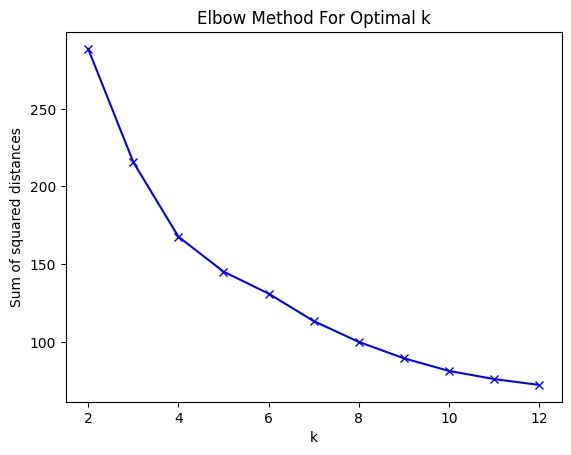

In [ ]:
def elbow_plot(min_k, max_k, k_max_iter):
    # Elbow-curve/sum of squared distances
    sum_squared_distances = []
    k_range = range(min_k, max_k+1)
    for k in k_range:
        kmeans = KMeans(n_clusters=k, max_iter=k_max_iter)
        kmeans.fit(X)
        sum_squared_distances.append(kmeans.inertia_)

    # Plot the score for each value of k
    plt.plot(k_range, sum_squared_distances, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Sum of squared distances')
    plt.title('Elbow Method For Optimal k')
    plt.show()

elbow_plot(2,12, 50)

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=4)
players_scaled["Cluster"] = kmeans.fit_predict(X)
players_scaled["Cluster"] = players_scaled["Cluster"].astype("category")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
players_scaled

,name,S/R,Avg,Posn,Innings,Cluster
0,Abdul Samad,-0.035589,-0.335478,1.388480,-0.456320,3
1,Abhinav Manohar,-0.356557,-0.285990,1.019647,-0.699404,3
2,Abhishek Sharma,0.401115,-0.045401,-0.440741,-0.082792,0
3,Abishek Porel,-0.372653,-1.003585,1.757314,-0.795132,3
4,Aiden Markram,0.520974,1.674661,0.038219,-0.339113,0
...,...,...,...,...,...,...
106,Washington Sundar,-1.041070,-0.497369,-0.044460,-0.431952,1
107,Wriddhiman Saha,-0.119031,0.313059,-0.560852,1.223835,2
108,Yash Dhull,-2.016987,-1.971382,0.115125,-0.840844,1
109,Yashasvi Jaiswal,0.772970,-0.031750,-1.631970,-0.191724,0


In [ ]:
df  = pd.read_csv("/content/drive/MyDrive/DATA PREMIER LEAGUE/DATA PREMIER LEAGUE/preprocessed_players_list.csv")

In [ ]:
df.head()

,Unnamed: 0,Team,Player,Role,Auction Price,Nation,team_encode,player_encode,country_encode,role_encode,team_full_name
0,0,CSK,MS Dhoni,Batsman,INR 12 Cr(R),India,0,98,4,2,Chennai Super Kings
1,1,CSK,Ruturaj Gaikwad,Batsman,INR 6 Cr(R),India,0,174,4,2,Chennai Super Kings
2,2,CSK,Devon Conway,Batsman,INR 1 crores(R),New Zealand,0,45,6,2,Chennai Super Kings
3,3,CSK,Deepak Chahar,Bowler,INR 14 crores(R),India,0,42,4,3,Chennai Super Kings
4,4,CSK,Tushar Deshpande,Bowler,INR 20 Lakhs(R),India,0,221,4,3,Chennai Super Kings


In [ ]:
df_ = players_scaled.merge(df,left_on="name", right_on="Player",how="left")

In [ ]:
df_

,name,S/R,Avg,Posn,Innings,Cluster,Unnamed: 0,Team,Player,Role,Auction Price,Nation,team_encode,player_encode,country_encode,role_encode,team_full_name
0,Abdul Samad,-0.035589,-0.335478,1.388480,-0.456320,3,227.0,SRH,Abdul Samad,Allrounder,INR 4Cr(R),India,9.0,0.0,4.0,0.0,Sunrisers Hyderabad
1,Abhinav Manohar,-0.356557,-0.285990,1.019647,-0.699404,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Abhishek Sharma,0.401115,-0.045401,-0.440741,-0.082792,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Abishek Porel,-0.372653,-1.003585,1.757314,-0.795132,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Aiden Markram,0.520974,1.674661,0.038219,-0.339113,0,220.0,SRH,Aiden Markram,Batsman,INR 2.60 Crores(R),South Africa,9.0,6.0,8.0,2.0,Sunrisers Hyderabad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,Washington Sundar,-1.041070,-0.497369,-0.044460,-0.431952,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107,Wriddhiman Saha,-0.119031,0.313059,-0.560852,1.223835,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108,Yash Dhull,-2.016987,-1.971382,0.115125,-0.840844,1,29.0,DC,Yash Dhull,Batsman,INR 50 Lakhs(R),India,1.0,240.0,4.0,2.0,Delhi Capitals
109,Yashasvi Jaiswal,0.772970,-0.031750,-1.631970,-0.191724,0,173.0,RR,Yashasvi Jaiswal,Batsman,INR 4 Crores(R),India,8.0,242.0,4.0,2.0,Rajasthan Royals


In [ ]:
df_.to_csv(f"{dir_name}/preprocessed_batsmen.csv")

In [ ]:
df_

,name,S/R,Avg,Posn,Innings,Cluster,Unnamed: 0,Team,Player,Role,Auction Price,Nation,team_encode,player_encode,country_encode,role_encode,team_full_name
0,Abdul Samad,-0.035589,-0.335478,1.388480,-0.456320,3,227.0,SRH,Abdul Samad,Allrounder,INR 4Cr(R),India,9.0,0.0,4.0,0.0,Sunrisers Hyderabad
1,Abhinav Manohar,-0.356557,-0.285990,1.019647,-0.699404,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Abhishek Sharma,0.401115,-0.045401,-0.440741,-0.082792,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Abishek Porel,-0.372653,-1.003585,1.757314,-0.795132,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Aiden Markram,0.520974,1.674661,0.038219,-0.339113,0,220.0,SRH,Aiden Markram,Batsman,INR 2.60 Crores(R),South Africa,9.0,6.0,8.0,2.0,Sunrisers Hyderabad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,Washington Sundar,-1.041070,-0.497369,-0.044460,-0.431952,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107,Wriddhiman Saha,-0.119031,0.313059,-0.560852,1.223835,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108,Yash Dhull,-2.016987,-1.971382,0.115125,-0.840844,1,29.0,DC,Yash Dhull,Batsman,INR 50 Lakhs(R),India,1.0,240.0,4.0,2.0,Delhi Capitals
109,Yashasvi Jaiswal,0.772970,-0.031750,-1.631970,-0.191724,0,173.0,RR,Yashasvi Jaiswal,Batsman,INR 4 Crores(R),India,8.0,242.0,4.0,2.0,Rajasthan Royals


In [ ]:
d_bat = dict()
teams

{'CSK': 'Chennai Super Kings',
 'SRH': 'Sunrisers Hyderabad',
 'DC': 'Delhi Capitals',
 'GT': 'Gujarat Titans',
 'KKR': 'Kolkata Knight Riders',
 'LSG': 'Lucknow Super Giants',
 'MI': 'Mumbai Indians',
 'PBKS': 'Punjab Kings',
 'RR': 'Rajasthan Royals',
 'RCB': 'Royal Challengers Bangalore'}

In [ ]:
df = pd.read_csv(f"{dir_name}/preprocessed_batsmen.csv")

In [ ]:
df_ = df[df['Team'] == "CSK"]
df_

,Unnamed: 0.1,name,S/R,Avg,Posn,Innings,Cluster,Unnamed: 0,Team,Player,Role,Auction Price,Nation,team_encode,player_encode,country_encode,role_encode,team_full_name
5,5,Ajinkya Rahane,-0.097466,0.634841,-1.318752,1.815168,2,14.0,CSK,Ajinkya Rahane,Batsman,INR 50 Lakhs(R),India,0.0,8.0,4.0,2.0,Chennai Super Kings
25,25,Devon Conway,0.221472,2.329169,-1.280411,-0.485875,0,2.0,CSK,Devon Conway,Batsman,INR 1 crores(R),New Zealand,0.0,45.0,6.0,2.0,Chennai Super Kings
48,48,MS Dhoni,0.362337,1.497019,0.615545,2.600625,2,0.0,CSK,MS Dhoni,Batsman,INR 12 Cr(R),India,0.0,98.0,4.0,2.0,Chennai Super Kings
80,80,Ruturaj Gaikwad,0.293892,1.372437,-1.676353,0.045278,0,1.0,CSK,Ruturaj Gaikwad,Batsman,INR 6 Cr(R),India,0.0,174.0,4.0,2.0,Chennai Super Kings


In [ ]:
for i in teams:
    df_ = df[df['Team'] == i]
    score = 0
    count = 0
    for index, row in df_.iterrows():
        if row["Cluster"] == 0:
            score += 75
        elif row["Cluster"] == 1:
            score += 25
        elif row["Cluster"] == 2:
            score += 100
        else:
            score += 50

        count += 1

    d_bat[i] = score / count

In [ ]:
d_bat

{'CSK': 87.5,
 'SRH': 75.0,
 'DC': 66.66666666666667,
 'GT': 91.66666666666667,
 'KKR': 78.125,
 'LSG': 62.5,
 'MI': 70.83333333333333,
 'PBKS': 75.0,
 'RR': 68.75,
 'RCB': 70.0}

In [ ]:
d_ball = {}

In [ ]:
for i in teams:
    df_ = retdataball[retdataball['Team'] == i]
    score = 0
    count = 0
    for index, row in df_.iterrows():
        if row["Cluster"] == 0:
            score += 100
        elif row["Cluster"] == 1:
            score += 33.33
        else:
            score += 66.67

        count += 1

    d_ball[i] = score / count

In [ ]:
d_ball

{'CSK': 88.89,
 'SRH': 86.668,
 'DC': 83.33375000000001,
 'GT': 87.50125,
 'KKR': 86.668,
 'LSG': 88.89,
 'MI': 100.0,
 'PBKS': 88.89,
 'RR': 90.47714285714287,
 'RCB': 86.668}

In [ ]:
d_final = dict()

for i in teams:
    d_final[i] = (d_bat[i] + d_ball[i]) / 2

d_final

{'CSK': 88.195,
 'SRH': 80.834,
 'DC': 75.00020833333335,
 'GT': 89.58395833333333,
 'KKR': 82.3965,
 'LSG': 75.695,
 'MI': 85.41666666666666,
 'PBKS': 81.945,
 'RR': 79.61357142857143,
 'RCB': 78.334}

In [ ]:
d_final = {k: v for k, v in sorted(d_final.items(), key=lambda item: item[1], reverse=True)}

In [ ]:
d_final

{'GT': 89.58395833333333,
 'CSK': 88.195,
 'MI': 85.41666666666666,
 'KKR': 82.3965,
 'PBKS': 81.945,
 'SRH': 80.834,
 'RR': 79.61357142857143,
 'RCB': 78.334,
 'LSG': 75.695,
 'DC': 75.00020833333335}

It shows that GT has higher probability of getting the ipl 2024 trophy followed by CSK.